<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Usefull-Links-and-Sources" data-toc-modified-id="Usefull-Links-and-Sources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Usefull Links and Sources</a></span><ul class="toc-item"><li><span><a href="#Image-processing-and-Convolution" data-toc-modified-id="Image-processing-and-Convolution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Image processing and Convolution</a></span></li><li><span><a href="#Applications" data-toc-modified-id="Applications-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Applications</a></span></li><li><span><a href="#Useful-packages-for-convolution:" data-toc-modified-id="Useful-packages-for-convolution:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Useful packages for convolution:</a></span></li></ul></li><li><span><a href="#Discrete-Convolution-in-1D" data-toc-modified-id="Discrete-Convolution-in-1D-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discrete Convolution in 1D</a></span></li><li><span><a href="#Discrete-Convolution-in-2D" data-toc-modified-id="Discrete-Convolution-in-2D-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Discrete Convolution in 2D</a></span><ul class="toc-item"><li><span><a href="#Image-synthesis" data-toc-modified-id="Image-synthesis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Image synthesis</a></span></li><li><span><a href="#Kernel-Synthesis" data-toc-modified-id="Kernel-Synthesis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kernel Synthesis</a></span><ul class="toc-item"><li><span><a href="#2D-normalized-Gauss-function:" data-toc-modified-id="2D-normalized-Gauss-function:-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>2D normalized Gauss function:</a></span></li><li><span><a href="#Normalized-Gauss-Function-for-several-$\sigma$" data-toc-modified-id="Normalized-Gauss-Function-for-several-$\sigma$-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Normalized Gauss Function for several $\sigma$</a></span></li><li><span><a href="#5x5-Gauss-Kernel-Synthesis" data-toc-modified-id="5x5-Gauss-Kernel-Synthesis-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>5x5 Gauss Kernel Synthesis</a></span></li><li><span><a href="#Image---Kernel---Convolution" data-toc-modified-id="Image---Kernel---Convolution-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Image - Kernel - Convolution</a></span></li></ul></li><li><span><a href="#Gauss-filter-for-several-$\sigma$" data-toc-modified-id="Gauss-filter-for-several-$\sigma$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gauss filter for several $\sigma$</a></span></li><li><span><a href="#Example:-Sobel-Operator" data-toc-modified-id="Example:-Sobel-Operator-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Example: Sobel Operator</a></span></li></ul></li><li><span><a href="#Application-Examples" data-toc-modified-id="Application-Examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Application Examples</a></span><ul class="toc-item"><li><span><a href="#Gauss-Filter/Blur" data-toc-modified-id="Gauss-Filter/Blur-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gauss Filter/Blur</a></span></li><li><span><a href="#Edge-Detection-(Sobel-filter)" data-toc-modified-id="Edge-Detection-(Sobel-filter)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Edge Detection (Sobel filter)</a></span></li><li><span><a href="#Cosmic-Ray-Detection-(LAcosmic-filter" data-toc-modified-id="Cosmic-Ray-Detection-(LAcosmic-filter-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cosmic Ray Detection (LAcosmic filter</a></span></li></ul></li></ul></div>

# Discrete Convolutions
This notebook gives some examples on convolutions in general and gives some simple examples on how one could implement convolutions in python.

## Usefull Links and Sources
### Image processing and Convolution
- Convolution in matlab: http://biti3313matlabtutorial.blogspot.com/2012/05/lab03-intensity-transformation-and.html
- Sobel Operator: https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html
- Gauss Blur: https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
- Convolution: https://en.wikipedia.org/wiki/Convolution
### Applications
- Sobel Fitler: https://www.programcreek.com/python/example/89325/cv2.Sobel
- Image classification: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- Filtering and Convolution in Astro images: http://docs.astropy.org/en/stable/convolution/
- Cosmic Ray detection: https://github.com/astropy/astroscrappy (http://www.astro.yale.edu/dokkum/lacosmic/)
- WFGS2 slit locator: https://github.com/shissler1987/WFGS-SlitDetector/blob/master/SLIT_DETECT.ipynb

### Useful packages for convolution: 
- opencv
- astropy
- theano: http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
- pytorch
- tensorflow


In [1]:
### Necessary libs
import numpy as np
from matplotlib import pylab as plt
import matplotlib.gridspec as gridspec

from matplotlib import animation, rc
from IPython.display import HTML

from scipy.ndimage import convolve as spconvolve

### misc libs to make things prettier ... :-=)

from jupyterthemes import jtplot
jtplot.style(theme='onedork')
plt.rcParams['axes.grid'] = False
plt.rcParams['image.cmap'] = "Blues"

def array_number(DATA, climit = 90, ax = plt):
    for i in range(DATA.shape[0]):
        for j in range(DATA.shape[1]):
            c = "k"
            if DATA[i,j] > climit: c = "w"
            ax.text(j,i,str(int(DATA[i,j])), fontsize = 18,  color = c , ha = "center", va = "center")

## Discrete Convolution in 1D

The one dimensional convolution is defined as follows: 
$$(a \times b)[n] = \sum_{m=-\infty}^{\infty} a[m]b[n-m]$$
Let's define two simple vectors and take a look on what happens when creating the convolution. 

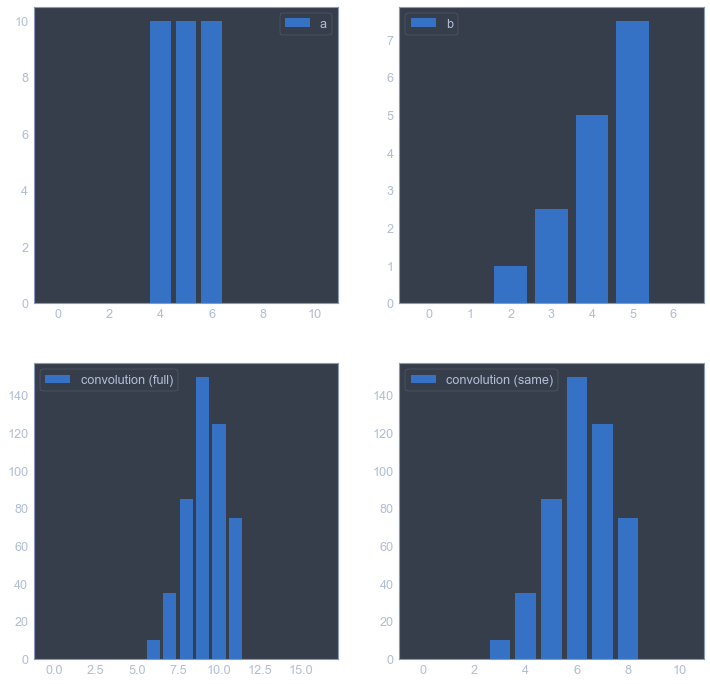

In [2]:
a = np.array([0.0 ,    0.0, 0.0,  0.0,  1.0,  1.0,  1.0, 0.0, 0.0, 0.0, 0.0])*10.
b = np.array([0.0 , 0.002 , 0.1, 0.25,  0.5, 0.75,  0.0])*10.


c1 = np.convolve(a,b, "full")
c2 = spconvolve(a,b)   

x = range(a.shape[0])
plt.figure(figsize = (12,12))
plt.subplot(2, 2, 1)
plt.bar(x,a, label = "a")
plt.legend()
plt.subplot(2, 2, 2)
plt.bar(range(b.shape[0]),b,  label = "b")
plt.legend()
plt.subplot(2, 2, 3)
plt.bar(range(c1.shape[0]),c1, label = "convolution (full)")
plt.legend(loc = "upper left")
plt.subplot(2, 2, 4)
plt.bar(x,c2, label = "convolution (same)")
plt.legend(loc = "upper left")
plt.show()

Following, we will try to implement our own solution for creating a convolution.

In [3]:
dm   = b.shape[0]
m    = dm/2                 ### always rounds down e.g. 2.5 --> 2
Am   = np.zeros((m))        ### same as [0,0]
aa   = np.hstack([Am,a,Am]) ### makes [0,0] V [0.0,   1.0,  1.0,  1.0,  0.0] V [0,0]

MULTI = []
A     = [] 
for n in range(len(a)):
    Ac   = aa[n:n+dm]
    A.append(Ac)
    MULTI.append(list(Ac*b[::-1]))
MULTI = np.array(MULTI)
SUM   = MULTI.sum(1)
print SUM

[  0.    0.    0.2  10.2  35.2  85.  150.  125.   75.    0.    0. ]


The figure below illustrates the convolution procedure.

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


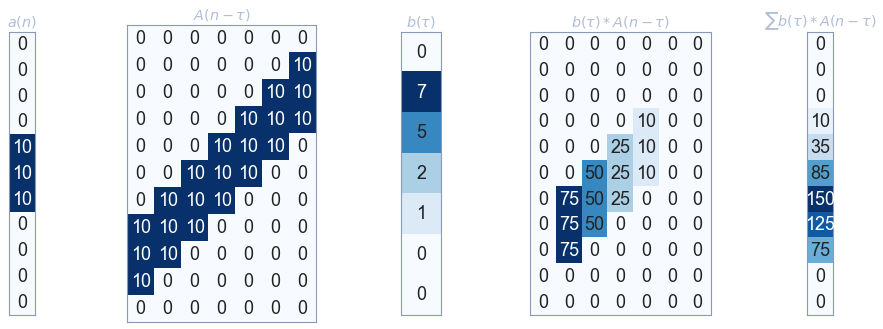

In [4]:
# Convolution procedure code
plt.figure(figsize = (14,13))
G = gridspec.GridSpec(3, 5)

ax1 = plt.subplot(G[1, 0])
ax1.imshow(np.array([list(a)]).T)
plt.xticks(()), plt.yticks(());
ax1.set_title(r"$a(n)$")
array_number(np.array([list(a)]).T, climit = (np.array([list(a)]).T).max()*0.7, ax = ax1)

ax2 = plt.subplot(G[:, 1])
ax2.imshow(A)
plt.xticks(()), plt.yticks(());
ax2.set_title(r"$A(n-\tau)$")
array_number(np.array(A), climit = np.array(A).max()*0.7, ax = ax2)

ax3 = plt.subplot(G[1, 2])
ax3.imshow(np.array([list(b)]).T[::-1])
plt.xticks(()), plt.yticks(());
ax3.set_title(r"$b(\tau)$")
array_number(np.array([list(b)]).T[::-1], climit = (np.array([list(b)]).T).max()*0.7, ax = ax3)

ax4 = plt.subplot(G[1, 3])
ax4.imshow(MULTI)
plt.xticks(()), plt.yticks(());
ax4.set_title(r"$b(\tau)*A(n-\tau)$")
array_number(MULTI, climit = MULTI.max()*0.7, ax = ax4)

ax5 = plt.subplot(G[1, 4])
ax5.imshow(np.array([list(SUM)]).T)
plt.xticks(()), plt.yticks(());
ax5.set_title(r"$\sum b(\tau)*A(n-\tau)$")
array_number(np.array([list(SUM)]).T, climit = np.array([list(SUM)]).max()*0.7, ax = ax5)

arrow1 = plt.axes([0.1, 0.4, .8, .2], facecolor='none')
arrow1.axis('off')
arrow1.arrow(0.05,0.5,0.05,0, width = 0.05, head_length = 0.02, color = "w")
arrow1.text(0.411,0.42,"x", fontsize = 30, color = "w")
arrow1.arrow(0.545,0.5,0.05,0, width = 0.05, head_length = 0.02, color = "w")
arrow1.arrow(0.886,0.5,0.05,0, width = 0.05, head_length = 0.02, color = "w")
plt.xticks(()), plt.yticks(());

plt.tight_layout()


In [5]:
# and an animation 

In [6]:
fig = plt.figure(figsize = (12,12))
G   = gridspec.GridSpec(2, 4)

ax1 = plt.subplot(G[0, :])
ax1.plot(range(b.shape[0]),b,"-o", label = "b")
line, = ax1.plot(range(len(A[0])), A[4] ,"-o", label = "a")

ax2 = plt.subplot(G[1, :])
conv = ax2.bar(np.arange(SUM[2:-2].shape[0]), SUM[2:-2], label = r"$a \times b$")
area, = ax2.plot(range(len(A[0])), A[4] ,"or", markersize = 16, label = "index area")
ax2.set_ylim([SUM.min(),SUM.max()+0.5])
def init():
    line.set_data([], [])
    line.set_label("a")
    
    area.set_data([], [])
    return (line,area,)
def animate(i):
    line.set_data(range(b.shape[0]), A[-int(i)])
    line.set_label("a")
    
    S    = np.zeros_like(SUM)

    S[i] = SUM[i]
    
    area.set_data(np.arange(S.shape[0])-2, S)
    
    return (line,area, )

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(A), interval=600, blit=True)
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.close()
HTML(anim.to_html5_video())


## Discrete Convolution in 2D
The convolution in two dimensions is defined as follows.

$$(a \times b)[x,y] = \sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty} a[m,n]b[x-m,y-n]$$

### Image synthesis 
We will first create a small image (11x11 data points), consisting of noise and three characteristic points.

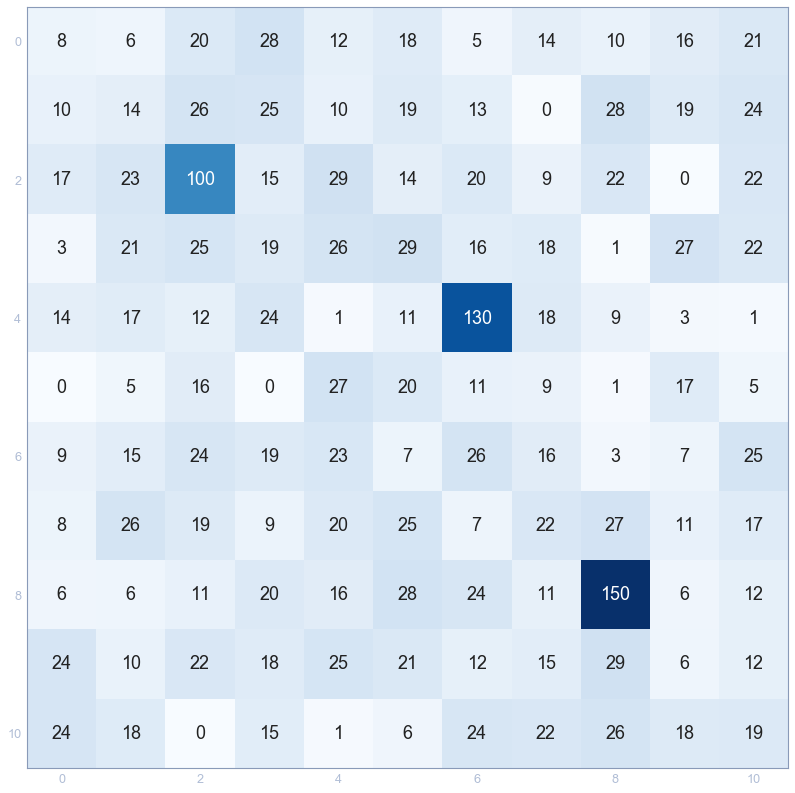

In [7]:
### Create Noise 
IMAGE = np.random.rand(11,11)*30.
### Create characteristic Poins 
IMAGE[2,2] = 100.
IMAGE[8,8] = 150.
IMAGE[4,6] = 130.

### show image 
plt.figure(figsize = (14,14))
plt.imshow(IMAGE)
array_number(IMAGE)
plt.show()

### Kernel Synthesis
In this example, we will create a convolution between two images. A larger feature image and smaller pattern image (Kernel). 
#### 2D normalized Gauss function:
We will create a kernel containing a gaussian distribution. The normalized gaussian n this example is defined as follows:
$$ g(x,y) = \frac{1}{2\pi \sigma^2} \cdot e^{-\frac{x^2+y^2}{2\sigma^2}}$$

#### Normalized Gauss Function for several $\sigma$

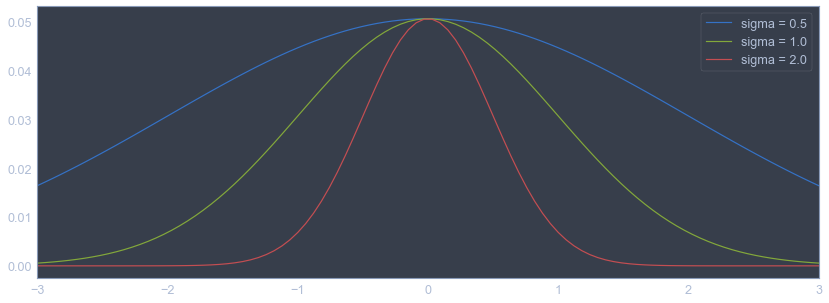

In [8]:
def do_gauss(x,y, sigma = 1.):
    return 1./(2.*np.pi**2.)*np.exp(-(x**2.+y**2.)/2.*sigma**2.)
X = np.linspace(-3.,3.,100)

plt.figure(figsize = (14,5))
plt.plot(X,do_gauss(X,0, 0.5), label = "sigma = 0.5")
plt.plot(X,do_gauss(X,0, 1.0), label = "sigma = 1.0")
plt.plot(X,do_gauss(X,0, 2.0), label = "sigma = 2.0")
plt.xlim([-3,3])
plt.legend()
plt.show()

#### 5x5 Gauss Kernel Synthesis

In [9]:
dim = 5
X   = np.linspace(-2,2,dim)*np.ones((5,5))
Y   = X.T

GKernel = do_gauss(X,Y,0.5)

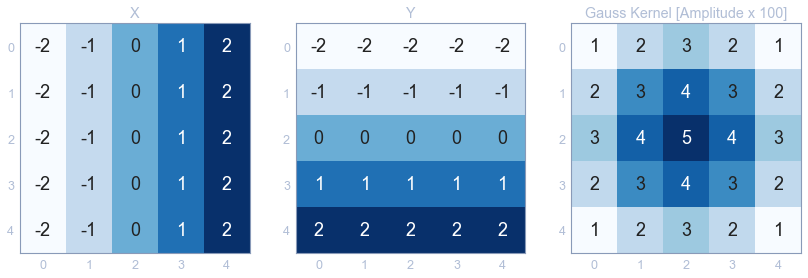

In [10]:
plt.figure(figsize = (14,7))

plt.subplot(1, 3, 1)
plt.imshow(X)
array_number(X, climit=0)
plt.title("X")

plt.subplot(1, 3, 2)
plt.imshow(Y)
array_number(Y, climit=0)
plt.title("Y")

plt.subplot(1, 3, 3)
plt.imshow(GKernel)
array_number(GKernel*100, climit=4)
plt.title("Gauss Kernel [Amplitude x 100]")
plt.show()

#### Image - Kernel - Convolution

- First Index of the image 

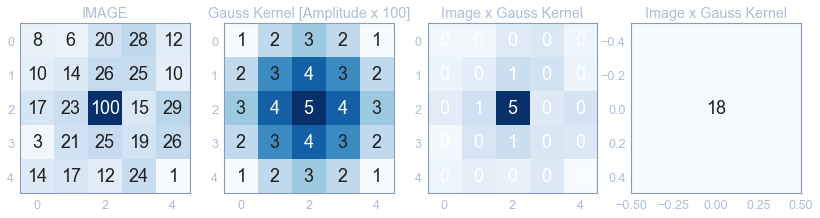

In [11]:
MULT1 = IMAGE[:5,:5]*GKernel
CONV1 = MULT1.sum()

plt.figure(figsize = (14,7))

plt.subplot(1, 4, 1)
plt.imshow(IMAGE[:5,:5])
array_number(IMAGE[:5,:5], climit=90)
plt.title("IMAGE")

plt.subplot(1, 4, 2)
plt.imshow(GKernel)
array_number(GKernel*100, climit=4)
plt.title("Gauss Kernel [Amplitude x 100]")

plt.subplot(1, 4, 3)
plt.imshow(MULT1)
array_number(MULT1, climit=0)
plt.title("Image x Gauss Kernel")

plt.subplot(1, 4, 4)
plt.imshow(np.array([[CONV1]]))
array_number(np.array([[CONV1]]), climit=100)
plt.title("Image x Gauss Kernel")

plt.show()

- Entire Image

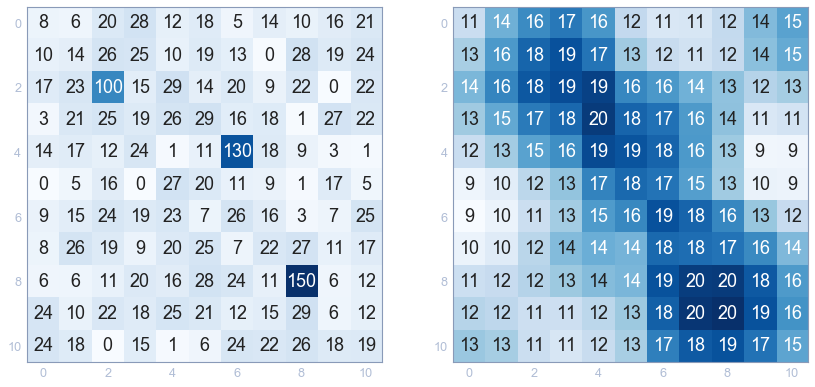

In [12]:
CONVOLUTION = spconvolve(IMAGE, GKernel)

plt.figure(figsize = (14,7))

plt.subplot(1, 2, 1)
plt.imshow(IMAGE)
array_number(IMAGE)

plt.subplot(1, 2, 2)
plt.imshow(CONVOLUTION)
array_number(CONVOLUTION, CONVOLUTION.max()*0.7)
plt.show()

### Gauss filter for several $\sigma$

In [13]:
FRAMES = []
def Gauss_Filter(IM, SIGMA): 
    dim = 5
    x   = np.linspace(-2,2,dim)*np.ones((5,5))
    y   = x.T
    kernel = do_gauss(x,y,SIGMA)
    return spconvolve(IM, kernel)
    
SIGMAS = np.linspace(0.1,2.,30)[::-1]
BLURS  = []


ANIMATION = plt.figure(figsize = (8,8));
for i in SIGMAS:
    BLUR    = Gauss_Filter(IMAGE, i)
    BLURIM  = plt.imshow(BLUR);
    title   = plt.text(-0.15,0.25,r"$\sigma$="+str(round(i,1)), color = "r", fontsize = 29);
    plt.xticks(()), plt.yticks(());
    FRAMES.append([BLURIM, title,])
    #FRAMES.append(BLUR)
Animation_object = animation.ArtistAnimation(ANIMATION, 
                                             FRAMES, 
                                             interval=200, 
                                             repeat_delay=3000, blit=False);    
plt.close()
HTML(Animation_object.to_html5_video())
#Animation_object.save('blur.mp4')


### Example: Sobel Operator 
    

In [14]:
sobel_kernel = np.array([[-1.,0.,1.],[-2.,0.,2.],[-1.,0.,1.]])

def convolution2D(DATA,KERNEL):
    n      = 0
    crops  = []
    kdim   = int(KERNEL.shape[0]/2)
    h, w,  = DATA.shape[0]-kdim, DATA.shape[1]-kdim
    
    CIMAGE = np.zeros(((h)*(w),h,w))
    for i in range(kdim,h):
        for j in range(kdim,w):
            crop = DATA[i-kdim:i+kdim+kdim,j-kdim:j+kdim+1]
            crops.append(crop)
            CIMAGE[n,i-kdim,j-kdim] = (crop*KERNEL).sum()
            n += 1
    return np.array(crops), CIMAGE

crops, cimages = convolution2D(IMAGE,sobel_kernel)

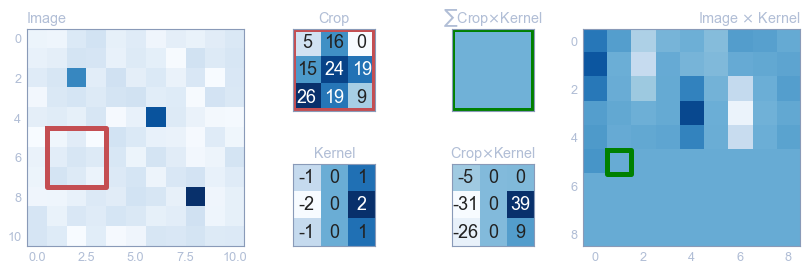

In [21]:
plt.figure(figsize = (14,4))
G = gridspec.GridSpec(5, 10)

dim = cimages.shape[-1]-1
n = 1
m = 5
i = (m)*dim+n


ax1 = plt.subplot(G[:, :3])
ax1.imshow(IMAGE)
ax1.plot([n-0.5,n+2.5,n+2.5,n-0.5,n-0.5],[m-0.5,m-0.5,m+2.5,m+2.5,m-0.5], "r", linewidth = 5)
ax1.set_title(r"Image", loc="left")

ax2 = plt.subplot(G[:2, 3:5])
ax2.imshow(crops[i])
ax2.plot([-0.5,2.5,2.5,-0.5,-0.5],[-0.5,-0.5,2.5,2.5,-0.5], "r", linewidth = 6)
array_number(crops[i], climit = (crops[i]).max()*0.7, ax = ax2)
plt.xticks(()), plt.yticks(());
ax2.set_title(r"Crop", loc="center")

ax3 = plt.subplot(G[3:, 3:5])
ax3.imshow(sobel_kernel)
array_number(sobel_kernel, climit = (sobel_kernel).max()*0.7, ax = ax3)
plt.xticks(()), plt.yticks(());
ax3.set_title(r"Kernel", loc="center")

ax4 = plt.subplot(G[3:, 5:7])
ax4.imshow(sobel_kernel*crops[i])
array_number(sobel_kernel*crops[i], climit = (sobel_kernel*crops[i]).max()*0.7, ax = ax4)
plt.xticks(()), plt.yticks(());
ax4.set_title(r"Crop$\times$Kernel", loc="center")

ax5 = plt.subplot(G[:2, 5:7])
ax5.imshow([[(sobel_kernel*crops[i]).sum()]], vmin = cimages.sum(0).min(), vmax=cimages.sum(0).max())
ax5.plot([-0.5,0.5,0.5,-0.5,-0.5],[-0.5,-0.5,0.5,0.5,-0.5], "green", linewidth = 6)
plt.xticks(()), plt.yticks(());
ax5.set_title(r"$\sum$Crop$\times$Kernel", loc="center")

ax6 = plt.subplot(G[:, 7:])
ax6.imshow(cimages[:i].sum(0),vmin = cimages.sum(0).min(), vmax=cimages.sum(0).max())
ax6.plot([n-.5,n+0.5,n+0.5,n-0.5,n-0.5],[m-0.5,m-.5,m+0.5,m+0.5,m-0.5], "green", linewidth = 5)
ax6.set_title(r"Image $\times$ Kernel", loc="right")
ax6.set_xlim(-0.5,dim-0.5)
ax6.set_ylim(dim-0.5,-0.5)
plt.show()

## Application Examples

### Gauss Filter/Blur 

openCV version:  4.1.0


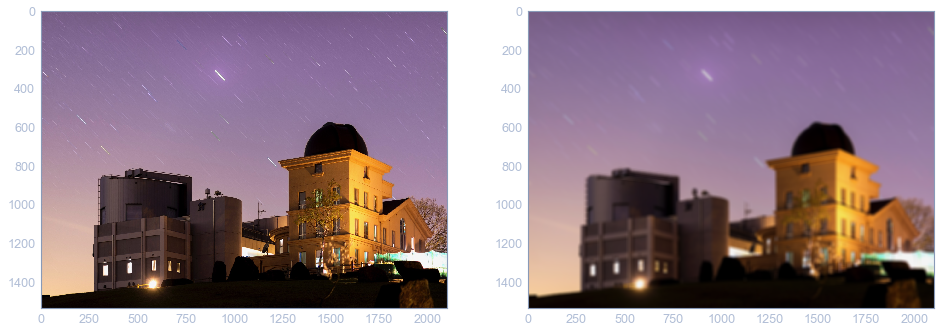

In [16]:
import cv2
print "openCV version: ", cv2.__version__
tenmondai       = cv2.imread("images/tenmondai.jpg")[:,:,::-1] ## changes BGR to RGB
tenmondai_gauss = cv2.GaussianBlur(tenmondai ,(25,25),10)

### print images 
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.imshow(tenmondai)
plt.subplot(1, 2, 2)
plt.imshow(tenmondai_gauss)
plt.show()

### Edge Detection (Sobel filter)
The following example demonstrates, how to detect edges using the sobel filter from openCV.

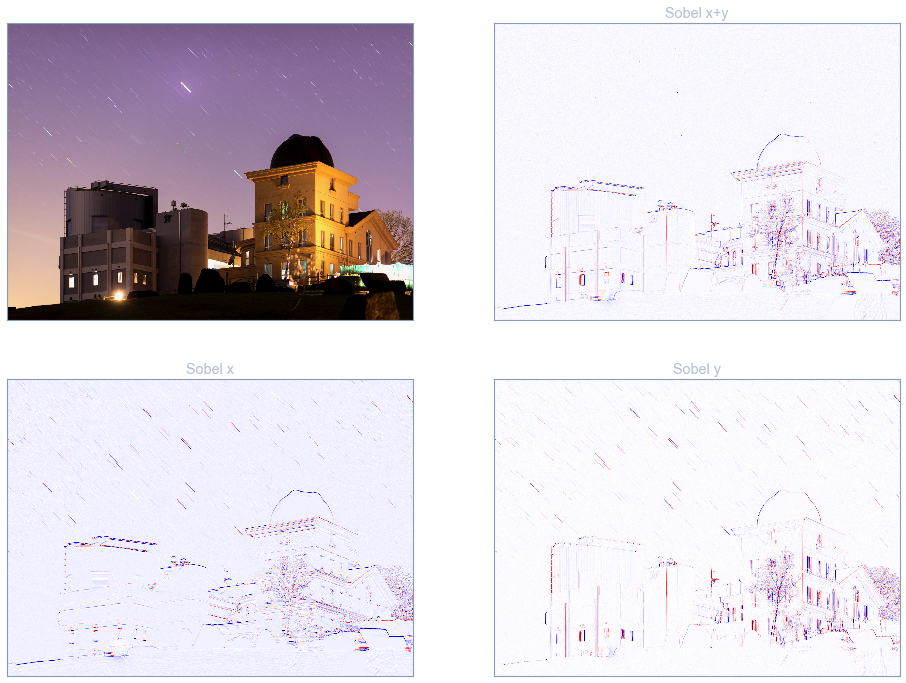

In [17]:
gx    = cv2.Sobel(tenmondai, cv2.CV_32F , 0, 1, -1)
gy    = cv2.Sobel(tenmondai, cv2.CV_32F , 1, 0, -1)

SOBEL = gx+gy
#SOBEL = np.abs(SOBEL-SOBEL.mean())

plt.figure(figsize = (16,12))
plt.subplot(2, 2, 1)
plt.xticks(()), plt.yticks(());
plt.imshow(tenmondai)
plt.subplot(2, 2, 2)
plt.xticks(()), plt.yticks(());
plt.imshow(SOBEL[:,:,1], "seismic")
plt.title("Sobel x+y")
plt.subplot(2, 2, 3)
plt.xticks(()), plt.yticks(());
plt.imshow(gx[:,:,1], "seismic")
plt.xticks(()), plt.yticks(());
plt.title("Sobel x")

plt.subplot(2, 2, 4)
plt.imshow(gy[:,:,1], "seismic")
plt.xticks(()), plt.yticks(());
plt.title("Sobel y")
plt.show()

### Cosmic Ray Detection (LAcosmic filter
In this example we will take a look on how to locate sharp-edged objects in astronomic images using a Lagrangian Kernel as discribed in the paper of P.G. Dokkum. (http://www.astro.yale.edu/dokkum/lacosmic/cosmic.ps.gz)

In [18]:
from PIL import Image
import requests

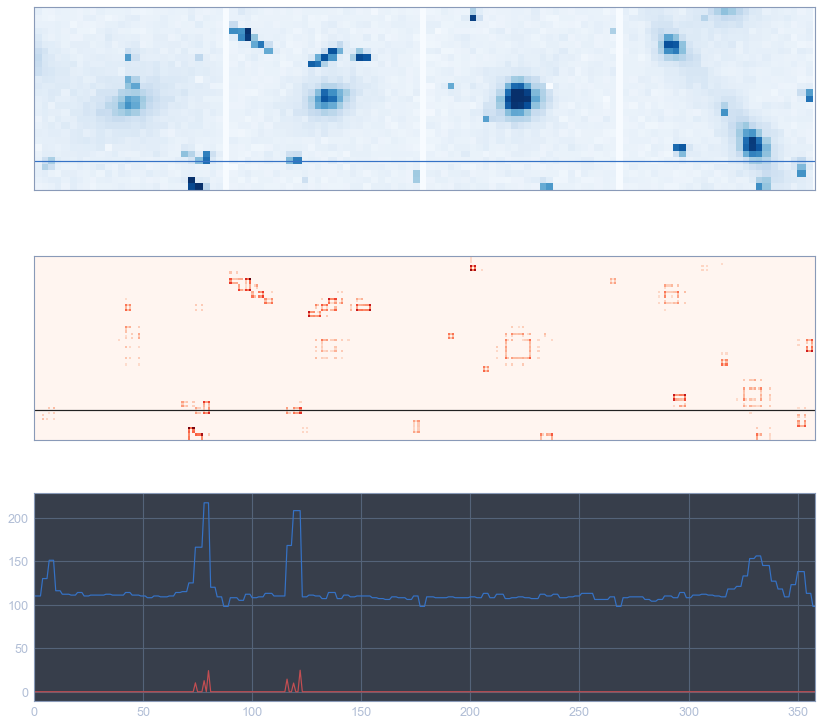

In [19]:
### Loading an example image directly from the webpage of astr yale.
htmlimage = requests.get("http://www.astro.yale.edu/dokkum/lacosmic/cosmic_loop.gif", stream=True).raw
LA_IMAGE  = (255-np.array(Image.open(htmlimage))).astype(float)

### Defien Lagrangian Kernel
KERNEL = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]).astype("float")/4.

### Remove low amplitude pixel
no_rays = spconvolve(LA_IMAGE, KERNEL)
mask    = (no_rays < 10)
no_rays[mask] = 0.

CUT = 70

plt.figure(figsize = (14,13))
plt.subplot(3, 1, 1)
plt.xticks(()), plt.yticks(());
plt.imshow(LA_IMAGE)
plt.plot([0,LA_IMAGE.shape[1]], [CUT,CUT], "b")
plt.xlim([0,no_rays.shape[1]/2])

plt.subplot(3, 1, 2)
plt.xticks(()), plt.yticks(());
plt.imshow(no_rays, "Reds")
plt.plot([0,LA_IMAGE.shape[1]], [CUT,CUT], "k")
plt.xlim([0,no_rays.shape[1]/2])

plt.subplot(3, 1, 3)
plt.plot(no_rays[CUT], "r")
plt.plot(LA_IMAGE[CUT], "b")
plt.grid(True)
plt.xlim([0,no_rays.shape[1]/2])
plt.show()
